In [1]:
import gym
import pybullet_envs
from pybullet_envs.deep_mimic.gym_env.deep_mimic_env import HumanoidDeepBulletEnv
import matplotlib.pyplot as plt

import numpy as np

class CustomHumanoidDeepBulletEnv(HumanoidDeepBulletEnv):
    metadata = {'render.modes': ['human', 'rgb_array'], 'video.frames_per_second': 50}
        
    def __init__(self, renders=False, arg_file='', test_mode=False,
                 time_step=1./240, rescale_actions=True, rescale_observations=True,
                 custom_cam_dist=4, custom_cam_pitch=0.1, custom_cam_yaw=45):
        
        super().__init__(renders=renders, arg_file=arg_file, test_mode=test_mode,
                         time_step=time_step, rescale_actions=rescale_actions, 
                         rescale_observations=rescale_observations)
        
        self._cam_dist = custom_cam_dist
        self._cam_pitch = custom_cam_pitch
        self._cam_yaw = custom_cam_yaw

    def render(self, mode='human', close=False):
        if mode == "human":
            self._renders = True
        if mode != "rgb_array":
            return np.array([])
        human = self._internal_env._humanoid
        base_pos, orn = self._p.getBasePositionAndOrientation(human._sim_model)
        base_pos = np.asarray(base_pos)
        # track the position
        base_pos[1] += 0.1
        rpy = self._p.getEulerFromQuaternion(orn)  # rpy, in radians
        rpy = 180 / np.pi * np.asarray(rpy)  # convert rpy in degrees

        if (not self._p == None):
            view_matrix = self._p.computeViewMatrixFromYawPitchRoll(
                cameraTargetPosition=base_pos,
                distance=self._cam_dist,
                yaw=self._cam_yaw,
                pitch=self._cam_pitch,
                roll=0,
                upAxisIndex=1)
            proj_matrix = self._p.computeProjectionMatrixFOV(fov=60,
                    aspect=float(self._render_width) / self._render_height,
                    nearVal=0.1,
                    farVal=100.0)
            (_, _, px, _, _) = self._p.getCameraImage(
                width=self._render_width,
                height=self._render_height,
                renderer=self._p.ER_BULLET_HARDWARE_OPENGL,
                viewMatrix=view_matrix,
                projectionMatrix=proj_matrix)
            # self._p.resetDebugVisualizerCamera(
            #   cameraDistance=2 * self._cam_dist,
            #   cameraYaw=self._cam_yaw,
            #   cameraPitch=self._cam_pitch,
            #   cameraTargetPosition=base_pos
            # )
        else:
            px = np.array([[[255,255,255,255]]*self._render_width]*self._render_height, dtype=np.uint8)
        rgb_array = np.array(px, dtype=np.uint8)
        rgb_array = np.reshape(np.array(px), (self._render_height, self._render_width, -1))
        rgb_array = rgb_array[:, :, :3]
        return rgb_array

/Users/avaliveru/miniforge3/envs/stepsync/lib/python3.12/site-packages/gym/envs/registration.py:407: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(
pybullet build time: May  5 2024 14:58:32
/Users/avaliveru/miniforge3/envs/stepsync/lib/python3.12/site-packages/pybullet_envs/deep_mimic/gym_env/deep_mimic_env.py:21: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import parse_version


run_humanoid3d_dance_b_args.txt
Initialization strategy: InitializationStrategy.RANDOM
argv[0]=
Version = 4.1 Metal - 88
Vendor = Apple
Renderer = Apple M2 Max
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
motion_file= data/motions/humanoid3d_dance_b.txt
LOADING humanoid!
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: urdfdom: no axis element for Joint, defaulting to (1,0,0) axis chest

b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: urdfdom: no axis element for Joint, defaulting to (1,0,0) axis neck

b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: urdfdom: no axis element for Joint, defaulting to (1,0,0) axis right_hip

b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: urdfdom: no axis element for Joint, default

/Users/avaliveru/miniforge3/envs/stepsync/lib/python3.12/site-packages/gym/spaces/box.py:112: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


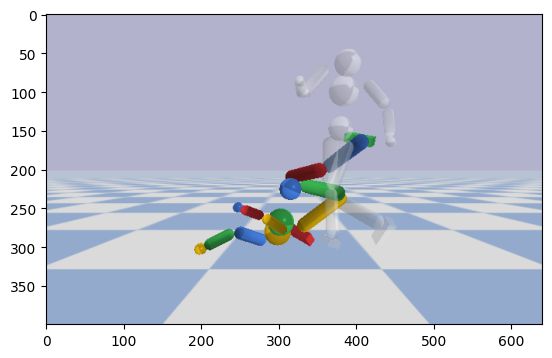

In [2]:
# Example usage
env = CustomHumanoidDeepBulletEnv(renders=True, arg_file='run_humanoid3d_dance_b_args.txt', custom_cam_dist=2.2, custom_cam_pitch=0, custom_cam_yaw=90)
observation = env.reset()
for _ in range(100):
    action = env.action_space.sample()  # Assuming you have defined the action space
    observation, reward, done, info = env.step(action)
    image = env.render(mode='rgb_array')  # Get the camera image
    if done:
        break
    
plt.imshow(image)
env.close()